<div align = "center">

AML Assignment 1 : SMS Spam Classification Prototype

Part I - Data Preparation

Trishita Patra

</div>

The file does the following:
- loading the data from the given file path
- preprocessing the data 
- splitting into train/validation/test 
- storing the splits at train.csv/validation.csv/test.csv


### Required Libraries

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Helper Functions

In [2]:
def load_data(file_path: str) -> pd.DataFrame:
    """
    Load SMS Spam dataset from a file path.
    """
    df = pd.read_csv(
        file_path,
        sep="\t",
        header=None,
        names=["label", "text"]
    )
    return df

In [11]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess the dataset:
    - Display unique labels and their count
    - Validate label names and count
    - Lowercase text
    - Encode labels (ham -> 0, spam -> 1)
    """

    df = df.copy()

    # -------- Label validation --------
    unique_labels = df["label"].unique()
    num_unique = len(unique_labels)

    print(f"Unique labels found ({num_unique}): {unique_labels}")

    expected_labels = {"ham", "spam"}

    if num_unique != 2 or set(unique_labels) != expected_labels:
        raise ValueError(
            f"Label validation failed.\n"
            f"Expected labels: {expected_labels}\n"
            f"Found labels: {set(unique_labels)}"
        )

    # -------- Preprocessing --------
    df["text"] = df["text"].str.lower()
    df["label"] = df["label"].map({"ham": 0, "spam": 1})

    return df


In [4]:
def split_data(
    df: pd.DataFrame,
    test_size: float = 0.15,
    val_size: float = 0.15,
    random_state: int = 42
):
    """
    Split data into train, validation, and test sets (70/15/15).
    Stratification ensures label ratios remain constant.
    Missing values (if any) are removed before splitting.
    """

    # -------- Null check --------
    null_count = df.isnull().sum().sum()

    if null_count > 0:
        print(f"Found {null_count} missing values. Dropping rows with missing data.")
        df = df.dropna().reset_index(drop=True)
    else:
        print("No missing values found. Proceeding with split.")

    # -------- Split data --------
    train_df, temp_df = train_test_split(
        df,
        test_size=test_size + val_size,
        stratify=df["label"],
        random_state=random_state
    )

    relative_val_size = val_size / (test_size + val_size)

    val_df, test_df = train_test_split(
        temp_df,
        test_size=1 - relative_val_size,
        stratify=temp_df["label"],
        random_state=random_state
    )

    return train_df, val_df, test_df

In [5]:
def save_splits(train_df, val_df, test_df, output_dir="."):
    """
    Save train, validation, and test splits to CSV files.
    """
    train_df.to_csv(os.path.join(output_dir, "train.csv"), index=False)
    val_df.to_csv(os.path.join(output_dir, "validation.csv"), index=False)
    test_df.to_csv(os.path.join(output_dir, "test.csv"), index=False)

In [12]:
if __name__ == "__main__":
    data_path = "dataset/SMSSpamCollection"

    df = load_data(data_path)
    df = preprocess_data(df)

    train_df, val_df, test_df = split_data(df)
    save_splits(train_df, val_df, test_df)

    print("Data prepared and saved:")
    print(f"Train: {len(train_df)}")
    print(f"Validation: {len(val_df)}")
    print(f"Test: {len(test_df)}")

Unique labels found (2): ['ham' 'spam']
No missing values found. Proceeding with split.
Data prepared and saved:
Train: 3900
Validation: 836
Test: 836


### Choice of Evaluation metric



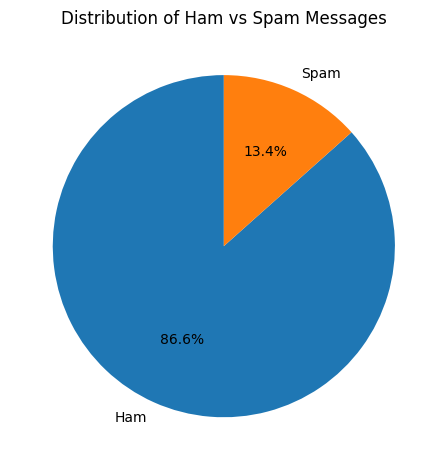

In [7]:
# Count ham vs spam
label_counts = df["label"].value_counts()
label_counts.index = ["Ham", "Spam"]

plt.figure()
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Ham vs Spam Messages")
plt.tight_layout()
plt.show()

- Accuracy is misleading because the dataset is imbalanced and can be high even if most spam is missed.
- Precision matters to avoid marking legitimate messages as spam, while recall matters to ensure spam is actually caught.
- F1-score is preferred because it balances precision and recall, making it the most reliable metric for spam detection.

### Checking Output

In [8]:
train_df.head()

,label,text
4914,1,"goal! arsenal 4 (henry, 7 v liverpool 2 henry ..."
2541,0,"they said if its gonna snow, it will start aro..."
5323,0,aah bless! how's your arm?
5171,0,oh k. . i will come tomorrow
2532,0,what's happening with you. have you gotten a j...


In [9]:
test_df.head()

,label,text
5440,0,thank you. do you generally date the brothas?
1887,1,dear 0776xxxxxxx u've been invited to xchat. t...
3767,0,yes.mum lookin strong:)
2292,0,remind me how to get there and i shall do so
820,0,boo babe! u enjoyin yourjob? u seemed 2 b gett...


In [10]:
val_df.head()

,label,text
2968,0,neft transaction with reference number &lt;#&...
5175,0,raji..pls do me a favour. pls convey my birthd...
4830,0,"how long before you get reply, just defer admi..."
4851,0,maybe you should find something else to do ins...
5052,0,with my sis lor... we juz watched italian job.
